In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import mixture
sns.set()

In [4]:
def new_z(contigs):
    mean = contigs.mean(axis=0)
    fractions = mean/mean.sum()
    E = (contigs.sum(axis=1) * np.ones(contigs.shape).T).T * fractions
    alt_z = (contigs - E)/np.sqrt(E)
    return alt_z


def nucl_lists():
    """
    Generate lists of possible nucleotides
    
    Outputs:
    di_list - list of possible dinuclotides
    tri_list - list of possible trinuclotides
    tetra_list - list of possible tetranuclotides
    """
    
    nucl = ["A","T","C","G"]
    di_list = [i+j for i in nucl for j in nucl]
    tri_list = [i+j for i in di_list for j in nucl]
    tetra_list = [i+j for i in tri_list for j in nucl]

    return (di_list, tri_list, tetra_list)


def get_23(tetra_list, tetra_freq, tri_list, di_list):
    """
    Extract tri and di nucleotides frequencies 
    from tetranucleotides frequencies 
    
    imputs:
    di_list - list of possible dinuclotides
    tri_list - list of possible trinuclotides
    tetra_list - list of possible tetranuclotides
    tetra_freq - array of tetranuclotides counts
    
    Outputs:
    tri_nucl - dictionary of trinuclotides frequency
    di_nucl - dictionary of dinuclotides frequency
    """
    #Calculate 3 and 2-mers based on 4-mers
    di_nucl = {di_list[i]:0 for i in range(len(di_list))}
    tri_nucl = {tri_list[i]:0 for i in range(len(tri_list))}
    
    for i in range(len(tetra_list)):
        tri_nucl[tetra_list[i][0:3]] += tetra_freq[i]
    
    for i in tri_nucl:
        di_nucl[i[0:2]] += tri_nucl[i]

    return(tri_nucl, di_nucl)


In [5]:
counts = pd.read_csv("./pca2_tnf.csv")
labels = counts['genome']
labels = labels.values
counts = counts.drop('genome',axis=1)
c = counts.values
X = new_z(c)

In [6]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

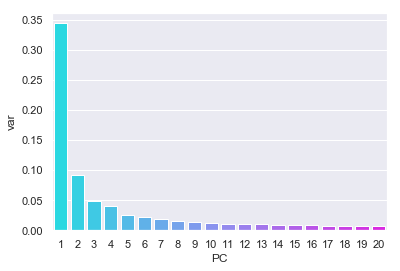

In [185]:
#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

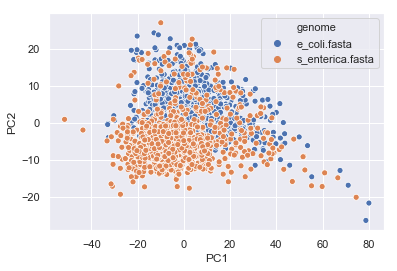

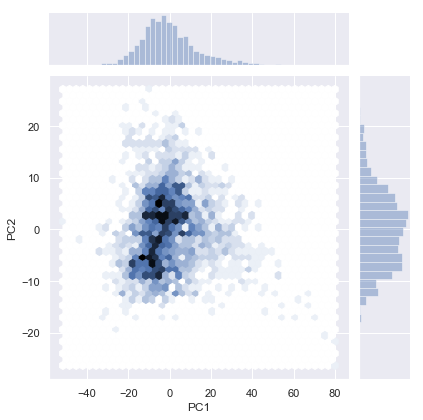

In [186]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="hex")


## Combine old and new z-scores

In [148]:
z_scores = pd.read_csv('./pca1_z.csv')
old = z_scores.values
old_labels = old[:,-1]
old = old[:,:-1]

In [149]:
all_scores = np.c_[X, old]
all_scores.shape

(1988, 512)

In [150]:
pca = PCA()
pca.fit(all_scores)
pca_data = pca.transform(all_scores)

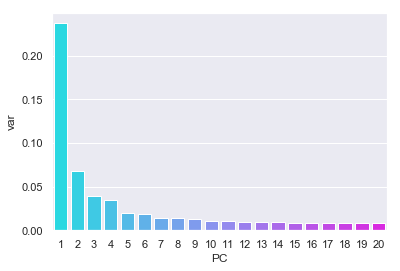

In [151]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

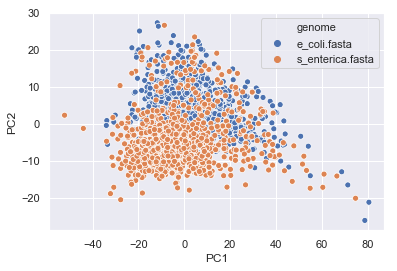

In [152]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)


## Add di and tri nuclotides

In [38]:
tri = []
di = []

for i in c:
    di_list, tri_list, tetra_list = nucl_lists()
    tri_nucl, di_nucl = get_23(tetra_list, i, tri_list, di_list)
    tri.append(np.array([i for i in tri_nucl.values()]))
    di.append(np.array([i for i in di_nucl.values()]))
              
tri = np.array(tri)
di = np.array(di)

tri_z = new_z(tri)
di_z = new_z(di)

all_z = np.c_[X, tri_z, di_z]

In [40]:
all_z.shape

(1988, 336)

In [41]:
pca = PCA()
pca.fit(all_z)
pca_data = pca.transform(all_z)

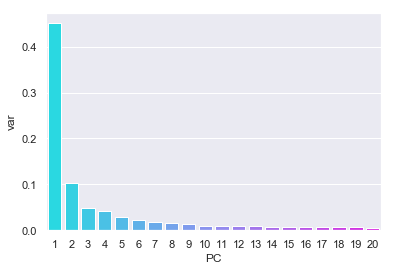

In [42]:
#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

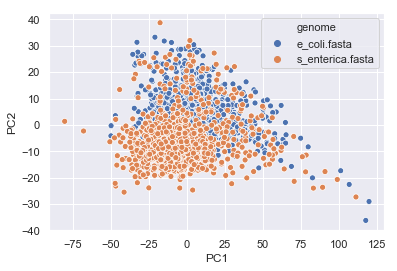

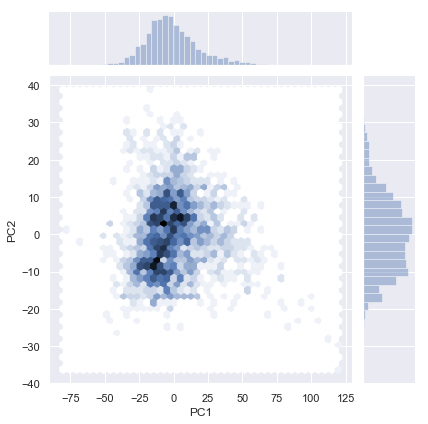

In [46]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="hex")
